# Swift UVOT Events

## Reading in Data

In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion

import matplotlib.pyplot as plt
import numpy as np

In [4]:
eventFile = fits.open('/home/saphio/sw00094137009um2w1po_uf.evt.gz')
imgFile = fits.open('/home/saphio/sw00094137009u_sk.img.gz')

primaryHdu = imgFile[0]
imgHdu = imgFile[1]

wcs = WCS(imgHdu.header)

events = eventFile[1].data

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 59236.264051 from DATE-OBS.
Set MJD-END to 59236.548553 from DATE-END'. [astropy.wcs.wcs]


In [6]:
events

FITS_rec([(6.32983520e+08,   1867,   1370, 1916, 1439, 2238, 1547, 1,   0),
          (6.32983520e+08,   1534,   1402, 1593, 1476, 2137, 1857, 1,   0),
          (6.32983520e+08,   2039,   1420, 2079, 1486, 2348, 1419, 1,   0),
          ...,
          (6.33013801e+08,   1164,   1636, 1229, 1718, 2616, 2093, 6, 256),
          (6.33013801e+08,    347,   1727,  432, 1810, 2294, 2827, 6, 256),
          (6.33013801e+08,   1453,   1997, 1503, 2069, 3058, 2034, 6, 256)],
         dtype=(numpy.record, [('TIME', '>f8'), ('RAWX', '>i2'), ('RAWY', '>i2'), ('DETX', '>i2'), ('DETY', '>i2'), ('X', '>i2'), ('Y', '>i2'), ('EXPREF', '>i2'), ('QUALITY', '>i2')]))

In [7]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 116.110733 3.551811 
CRPIX : 1604.5 1583.5 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.000139444442 0.000139444442 
NAXIS : 3208  3166

## Cleaning Event Data

In [8]:
events_clean = events[np.where((events.QUALITY == 0))]
## quality flag of 0 = good
print(f'removed {len(events) - len(events_clean)} events')

removed 1952995 events


## Displaying Event Data

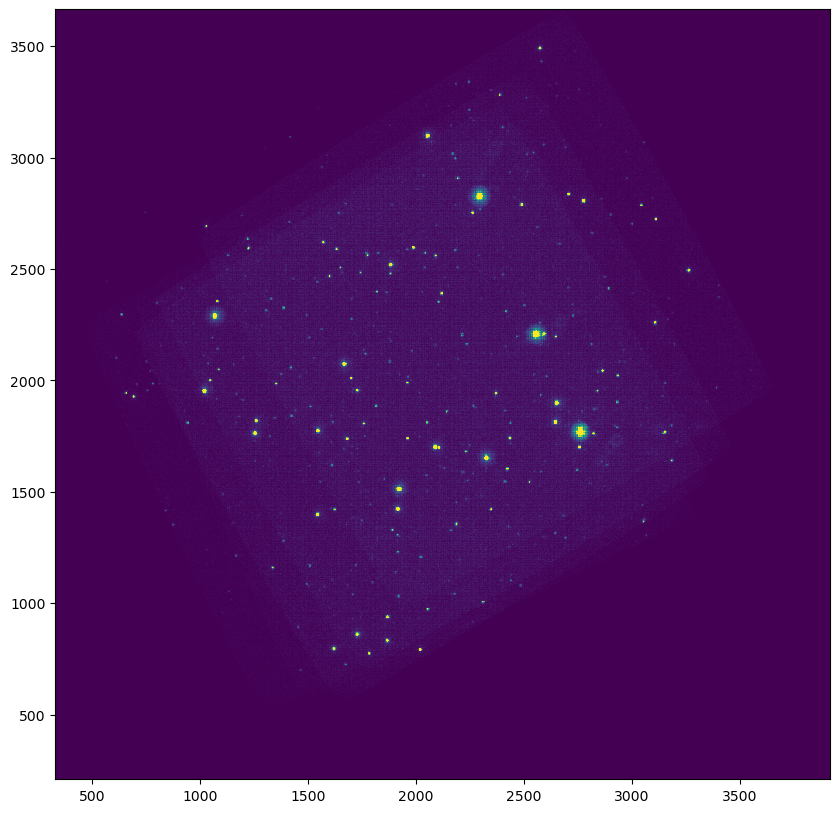

In [13]:
plt.figure(figsize=(10, 10))

histdata, x, y, img = plt.hist2d(events_clean.X, events_clean.Y, bins=1000, vmin=0, vmax=200)

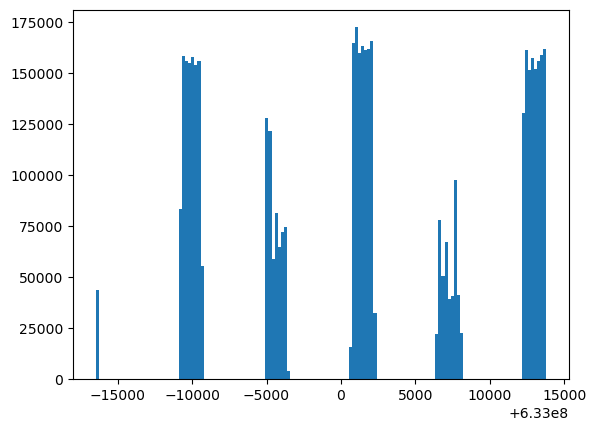

In [25]:
times = plt.hist(events_clean['TIME'], bins='auto')

In [28]:
## selecting a time period with continuous data

def evtInterval(tStart, tStop, evtList):
    interval = evtList [np.where((evtList.TIME > tStart) &
                                 (evtList.TIME < tStop))]
    
    return interval

## Practicing Making Images of Intervals

In [37]:
interval0 = evtInterval(632980000, 632985000, events_clean)
interval1 = evtInterval(632985000, 632992500, events_clean)
interval2 = evtInterval(632992500, 633000000, events_clean)
interval3 = evtInterval(633000000, 633003000, events_clean)
interval4 = evtInterval(633005000, 633010000, events_clean)
interval5 = evtInterval(633010000, 633015000, events_clean)

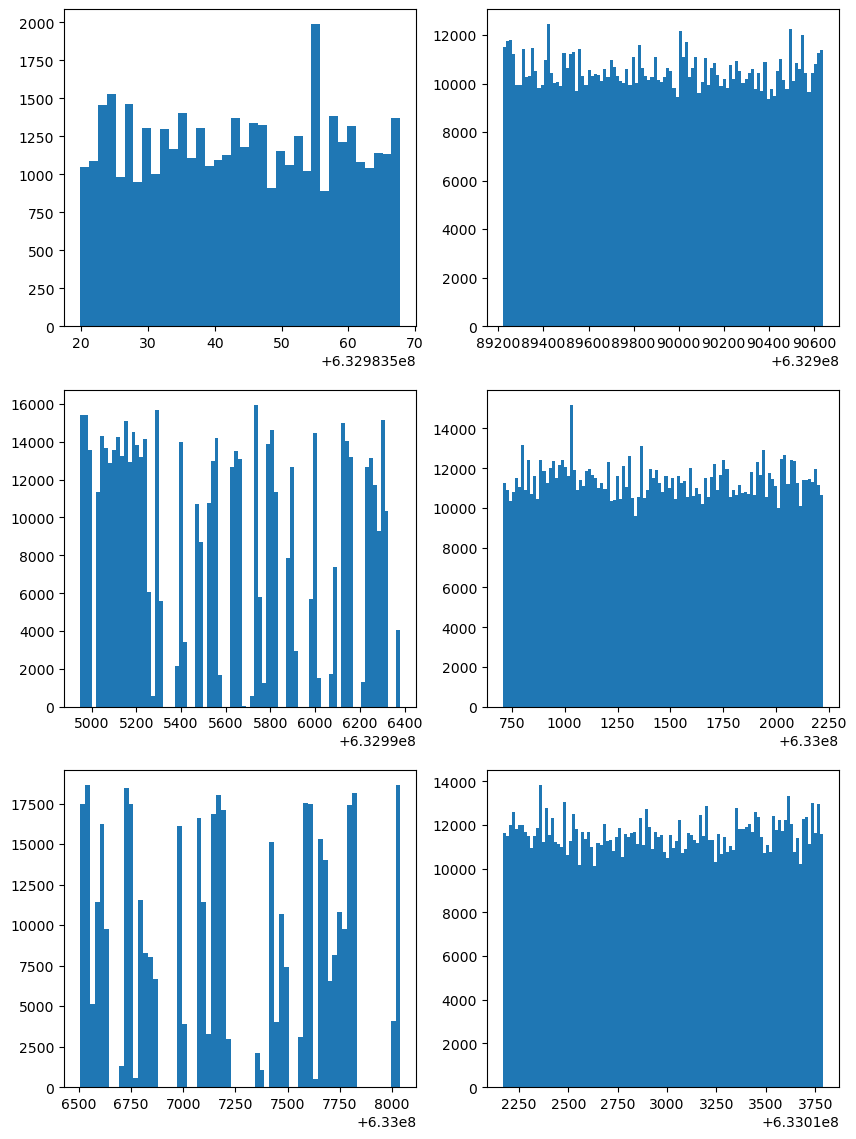

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 14))
_ = axes[0][0].hist(interval0['TIME'], bins='auto')
_ = axes[0][1].hist(interval1['TIME'], bins='auto')
_ = axes[1][0].hist(interval2['TIME'], bins='auto')
_ = axes[1][1].hist(interval3['TIME'], bins='auto')
_ = axes[2][0].hist(interval4['TIME'], bins='auto')
_ = axes[2][1].hist(interval5['TIME'], bins='auto')

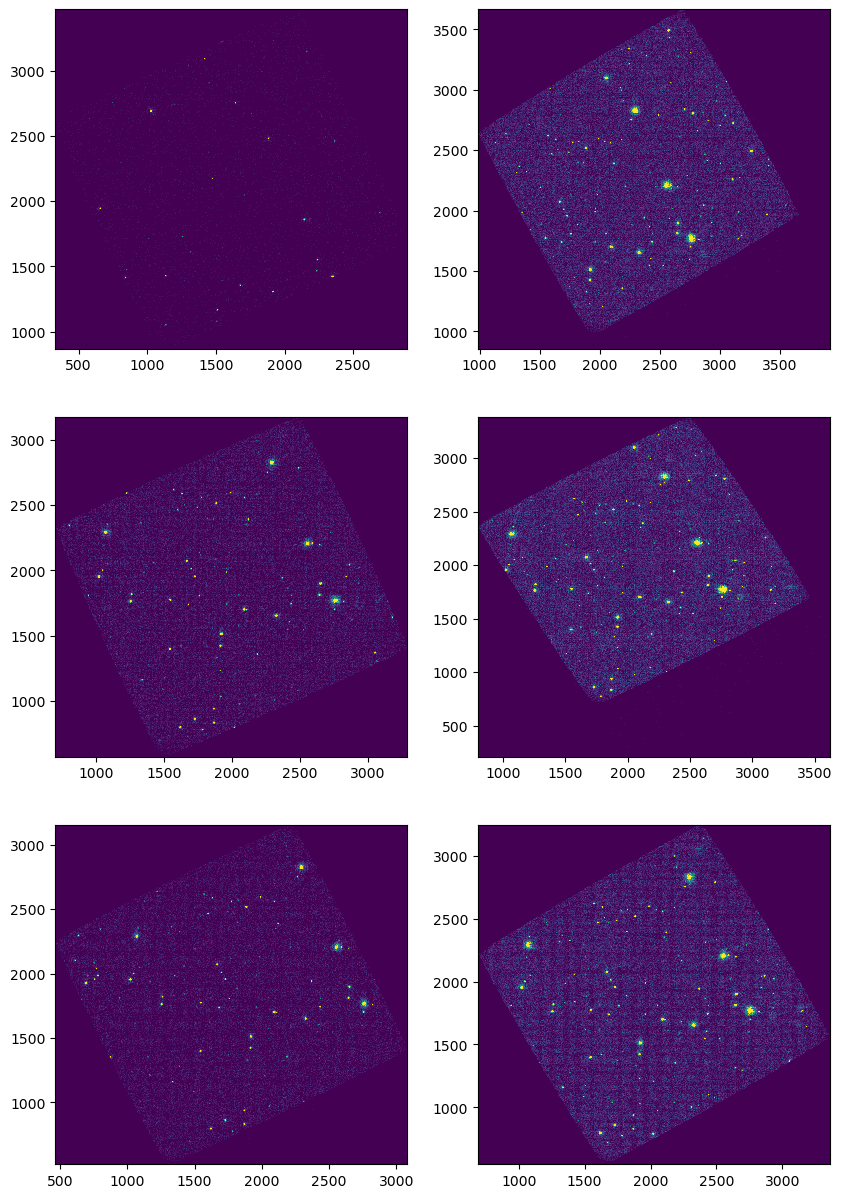

In [43]:
## visualization

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

histdata, x, y, img = axes[0][0].hist2d(interval0.X, interval0.Y, bins=1000, vmin=0, vmax = 20)
histdata, x, y, img = axes[0][1].hist2d(interval1.X, interval1.Y, bins=1000, vmin=0, vmax = 20)
histdata, x, y, img = axes[1][0].hist2d(interval2.X, interval2.Y, bins=1000, vmin=0, vmax = 20)
histdata, x, y, img = axes[1][1].hist2d(interval3.X, interval3.Y, bins=1000, vmin=0, vmax = 20)
histdata, x, y, img = axes[2][0].hist2d(interval4.X, interval4.Y, bins=1000, vmin=0, vmax = 20)
histdata, x, y, img = axes[2][1].hist2d(interval5.X, interval5.Y, bins=1000, vmin=0, vmax = 20)

## Star-finding